In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train = pd.read_csv("/content/train.csv")
test = pd.read_csv("/content/test.csv")
stores = pd.read_csv("/content/stores.csv")
transactions = pd.read_csv("/content/transactions.csv")
oil = pd.read_csv("/content/oil.csv")
holidays_events = pd.read_csv("/content/holidays_events.csv")

#BASIC EDA

In [3]:
print(train.shape)

(3000888, 6)


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000888 entries, 0 to 3000887
Data columns (total 6 columns):
 #   Column       Dtype  
---  ------       -----  
 0   id           int64  
 1   date         object 
 2   store_nbr    int64  
 3   family       object 
 4   sales        float64
 5   onpromotion  int64  
dtypes: float64(1), int64(3), object(2)
memory usage: 137.4+ MB


In [5]:
train.head()

,id,date,store_nbr,family,sales,onpromotion
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0
1,1,2013-01-01,1,BABY CARE,0.0,0
2,2,2013-01-01,1,BEAUTY,0.0,0
3,3,2013-01-01,1,BEVERAGES,0.0,0
4,4,2013-01-01,1,BOOKS,0.0,0


In [6]:
# import pandas as pd
# import numpy as np
# import matplotlib.pyplot as plt
# import seaborn as sns

# train = pd.read_csv("/Users/ishikasingh/Desktop/store-sales-time-series-forecasting/train.csv")
# test = pd.read_csv("/Users/ishikasingh/Desktop/store-sales-time-series-forecasting/test.csv")
# oil = pd.read_csv("/Users/ishikasingh/Desktop/store-sales-time-series-forecasting/oil.csv")
# stores = pd.read_csv("/Users/ishikasingh/Desktop/store-sales-time-series-forecasting/stores.csv")
# sample_submission = pd.read_csv("/Users/ishikasingh/Desktop/store-sales-time-series-forecasting/sample_submission.csv")
# holiday_events = pd.read_csv("/Users/ishikasingh/Desktop/store-sales-time-series-forecasting/holidays_events.csv")
# transactions = pd.read_csv("/Users/ishikasingh/Desktop/store-sales-time-series-forecasting/transactions.csv")


In [6]:
print(test.isnull().sum())

id             0
date           0
store_nbr      0
family         0
onpromotion    0
dtype: int64


In [7]:
print(train.columns.tolist())

['id', 'date', 'store_nbr', 'family', 'sales', 'onpromotion']


In [8]:
display(train.nunique())

,0
id,3000888
date,1684
store_nbr,54
family,33
sales,379610
onpromotion,362


In [9]:
print(train.describe(include='all'))

                  id        date     store_nbr      family         sales  \
count   3.000888e+06     3000888  3.000888e+06     3000888  3.000888e+06   
unique           NaN        1684           NaN          33           NaN   
top              NaN  2017-08-15           NaN  AUTOMOTIVE           NaN   
freq             NaN        1782           NaN       90936           NaN   
mean    1.500444e+06         NaN  2.750000e+01         NaN  3.577757e+02   
std     8.662819e+05         NaN  1.558579e+01         NaN  1.101998e+03   
min     0.000000e+00         NaN  1.000000e+00         NaN  0.000000e+00   
25%     7.502218e+05         NaN  1.400000e+01         NaN  0.000000e+00   
50%     1.500444e+06         NaN  2.750000e+01         NaN  1.100000e+01   
75%     2.250665e+06         NaN  4.100000e+01         NaN  1.958473e+02   
max     3.000887e+06         NaN  5.400000e+01         NaN  1.247170e+05   

         onpromotion  
count   3.000888e+06  
unique           NaN  
top              N

In [3]:
train['date'] = pd.to_datetime(train['date'])

In [4]:
print(train.dtypes)

id                      int64
date           datetime64[ns]
store_nbr               int64
family                 object
sales                 float64
onpromotion             int64
dtype: object


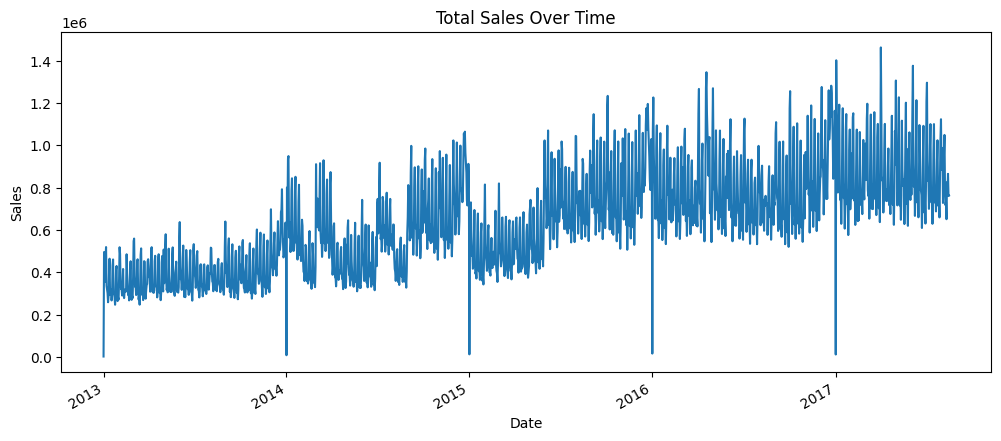

In [12]:
# Sales Over Time
plt.figure(figsize=(12, 5))
train.groupby("date")["sales"].sum().plot()
plt.title("Total Sales Over Time")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.show()

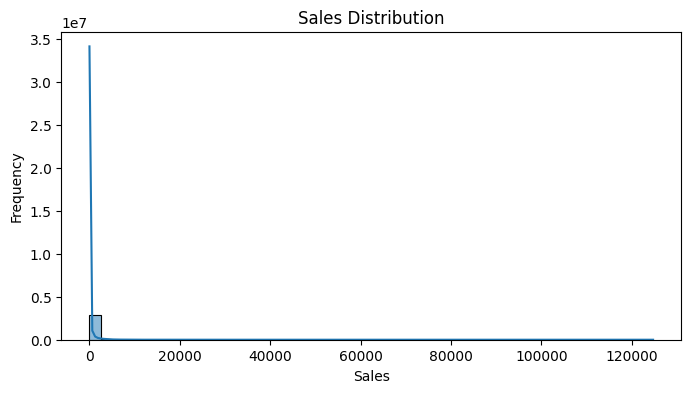

In [ ]:
# Sales Distribution
plt.figure(figsize=(8, 4))
sns.histplot(train['sales'], bins=50, kde=True)
plt.title("Sales Distribution")
plt.xlabel("Sales")
plt.ylabel("Frequency")
plt.show()

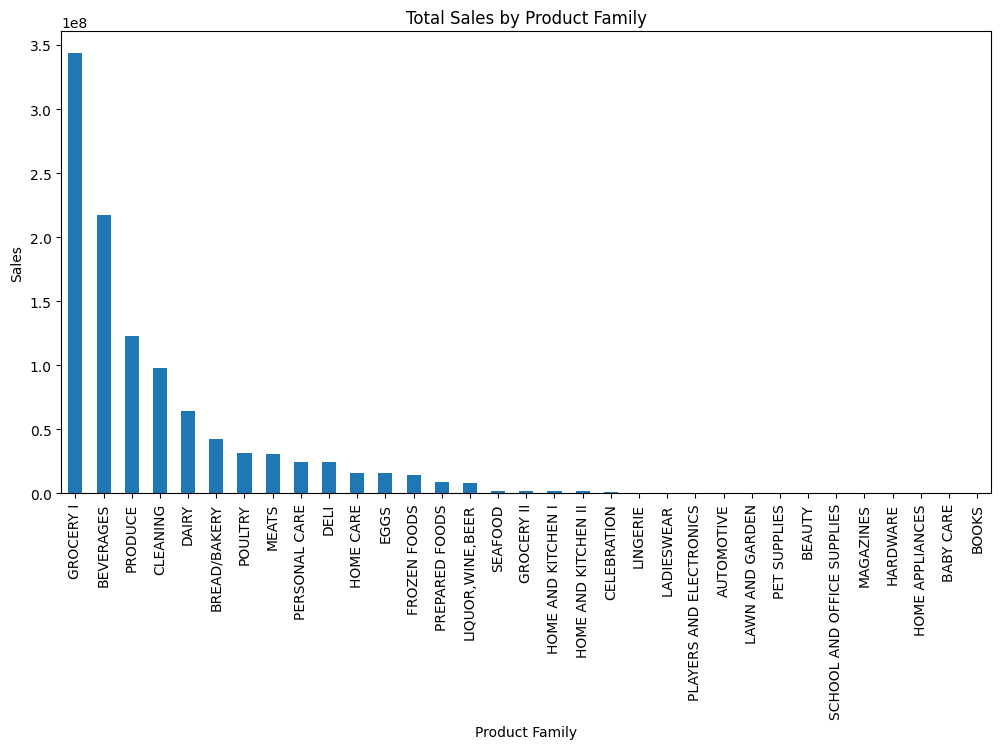

In [ ]:
# Sales by Product Family
if 'family' in train.columns:
    plt.figure(figsize=(12, 6))
    train.groupby('family')['sales'].sum().sort_values(ascending=False).plot(kind='bar')
    plt.title("Total Sales by Product Family")
    plt.xlabel("Product Family")
    plt.ylabel("Sales")
    plt.xticks(rotation=90)
    plt.show()

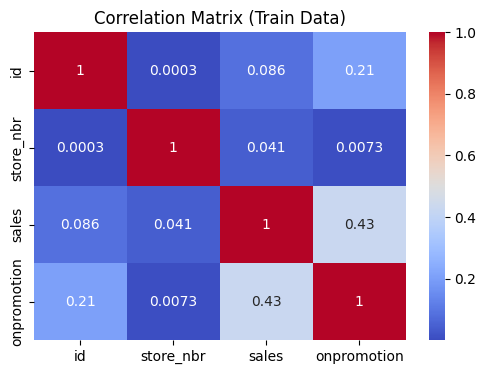

In [ ]:
# Correlation Heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(train.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix (Train Data)")
plt.show()

In [13]:
train.tail()

,id,date,store_nbr,family,sales,onpromotion
3000883,3000883,2017-08-15,9,POULTRY,438.133,0
3000884,3000884,2017-08-15,9,PREPARED FOODS,154.553,1
3000885,3000885,2017-08-15,9,PRODUCE,2419.729,148
3000886,3000886,2017-08-15,9,SCHOOL AND OFFICE SUPPLIES,121.000,8
3000887,3000887,2017-08-15,9,SEAFOOD,16.000,0


In [14]:
test.head()

,id,date,store_nbr,family,onpromotion
0,3000888,2017-08-16,1,AUTOMOTIVE,0
1,3000889,2017-08-16,1,BABY CARE,0
2,3000890,2017-08-16,1,BEAUTY,2
3,3000891,2017-08-16,1,BEVERAGES,20
4,3000892,2017-08-16,1,BOOKS,0


In [15]:
test['date'].max()

'2017-08-31'

In [16]:
print(test.shape)

(28512, 5)


In [17]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28512 entries, 0 to 28511
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           28512 non-null  int64 
 1   date         28512 non-null  object
 2   store_nbr    28512 non-null  int64 
 3   family       28512 non-null  object
 4   onpromotion  28512 non-null  int64 
dtypes: int64(3), object(2)
memory usage: 1.1+ MB


In [18]:
print(test.columns.tolist())

['id', 'date', 'store_nbr', 'family', 'onpromotion']


In [19]:
print(test.describe(include='all'))

                  id        date     store_nbr      family   onpromotion
count   2.851200e+04       28512  28512.000000       28512  28512.000000
unique           NaN          16           NaN          33           NaN
top              NaN  2017-08-16           NaN  AUTOMOTIVE           NaN
freq             NaN        1782           NaN         864           NaN
mean    3.015144e+06         NaN     27.500000         NaN      6.965383
std     8.230850e+03         NaN     15.586057         NaN     20.683952
min     3.000888e+06         NaN      1.000000         NaN      0.000000
25%     3.008016e+06         NaN     14.000000         NaN      0.000000
50%     3.015144e+06         NaN     27.500000         NaN      0.000000
75%     3.022271e+06         NaN     41.000000         NaN      6.000000
max     3.029399e+06         NaN     54.000000         NaN    646.000000


In [20]:
print(test.dtypes)

id              int64
date           object
store_nbr       int64
family         object
onpromotion     int64
dtype: object


In [21]:
transactions.head()

,date,store_nbr,transactions
0,2013-01-01,25,770
1,2013-01-02,1,2111
2,2013-01-02,2,2358
3,2013-01-02,3,3487
4,2013-01-02,4,1922


In [12]:
transactions["date"].max()

'2017-08-15'

In [13]:
print(transactions.shape)

(83488, 3)


In [24]:
print(transactions.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83488 entries, 0 to 83487
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   date          83488 non-null  object
 1   store_nbr     83488 non-null  int64 
 2   transactions  83488 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 1.9+ MB
None


In [25]:
print(transactions.isnull().sum())

date            0
store_nbr       0
transactions    0
dtype: int64


In [26]:
print(transactions.describe())

          store_nbr  transactions
count  83488.000000  83488.000000
mean      26.939237   1694.602158
std       15.608204    963.286644
min        1.000000      5.000000
25%       13.000000   1046.000000
50%       27.000000   1393.000000
75%       40.000000   2079.000000
max       54.000000   8359.000000


In [5]:
transactions['date'] = pd.to_datetime(transactions['date'])

In [6]:
print(transactions.dtypes)

date            datetime64[ns]
store_nbr                int64
transactions             int64
dtype: object


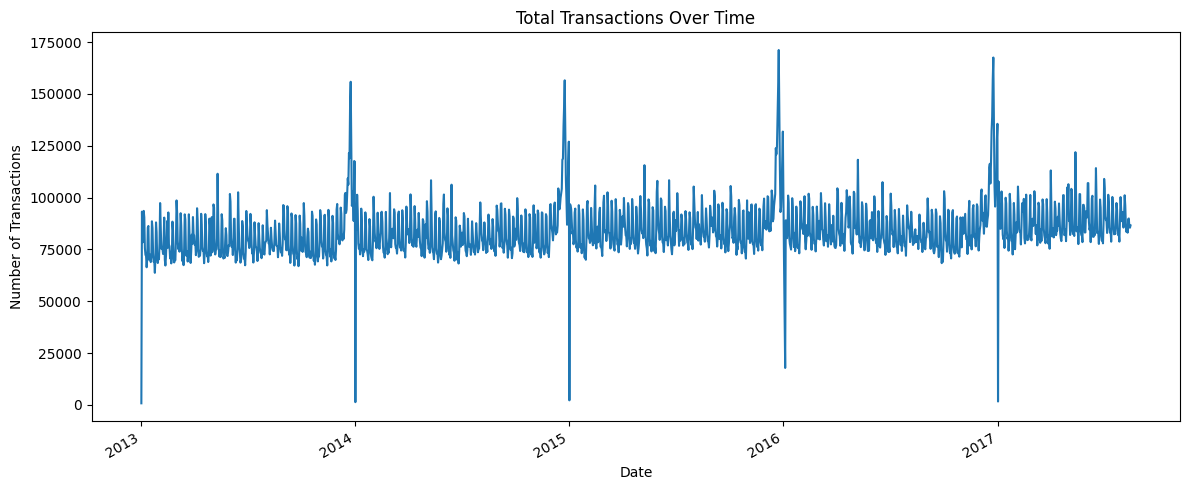

In [ ]:
# Transactions Over Time for All Stores
plt.figure(figsize=(12, 5))
transactions.groupby("date")["transactions"].sum().plot()
plt.title("Total Transactions Over Time")
plt.xlabel("Date")
plt.ylabel("Number of Transactions")
plt.tight_layout()
plt.show()


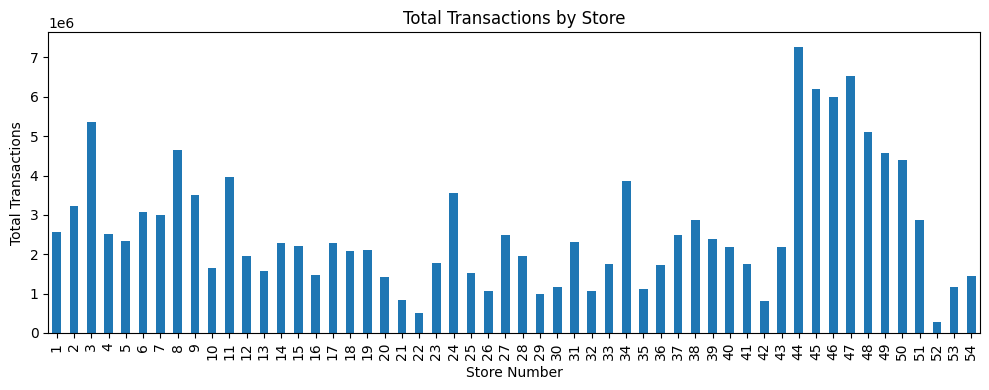

In [ ]:
# Transactions Per Store
plt.figure(figsize=(10, 4))
transactions.groupby("store_nbr")["transactions"].sum().plot(kind='bar')
plt.title("Total Transactions by Store")
plt.xlabel("Store Number")
plt.ylabel("Total Transactions")
plt.tight_layout()
plt.show()

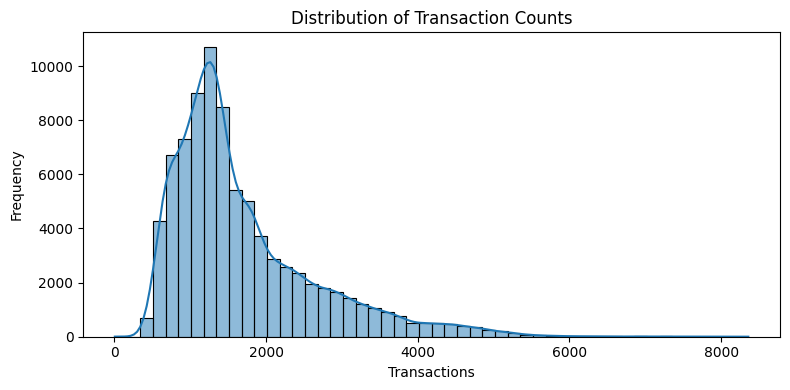

In [ ]:
#Distribution of Transactions
plt.figure(figsize=(8, 4))
sns.histplot(transactions['transactions'], bins=50, kde=True)
plt.title("Distribution of Transaction Counts")
plt.xlabel("Transactions")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

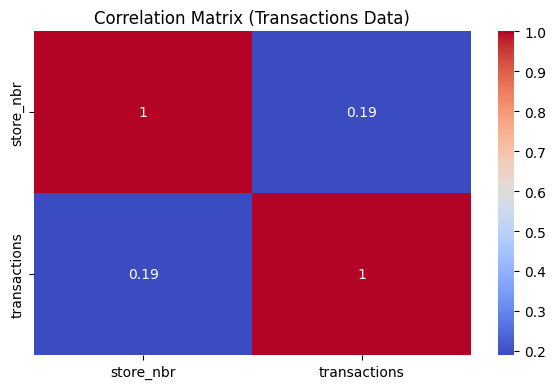

In [ ]:
# Correlation Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(transactions.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix (Transactions Data)")
plt.tight_layout()
plt.show()

In [29]:
stores.head()

,store_nbr,city,state,type,cluster
0,1,Quito,Pichincha,D,13
1,2,Quito,Pichincha,D,13
2,3,Quito,Pichincha,D,8
3,4,Quito,Pichincha,D,9
4,5,Santo Domingo,Santo Domingo de los Tsachilas,D,4


In [30]:
print(stores.shape)


(54, 5)


In [31]:
print(stores.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 0 to 53
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   store_nbr  54 non-null     int64 
 1   city       54 non-null     object
 2   state      54 non-null     object
 3   type       54 non-null     object
 4   cluster    54 non-null     int64 
dtypes: int64(2), object(3)
memory usage: 2.2+ KB
None


In [32]:
print(stores.columns.tolist())

['store_nbr', 'city', 'state', 'type', 'cluster']


In [33]:
print(stores.isnull().sum())

store_nbr    0
city         0
state        0
type         0
cluster      0
dtype: int64


In [34]:
print(stores.describe(include='all'))

        store_nbr   city      state type    cluster
count   54.000000     54         54   54  54.000000
unique        NaN     22         16    5        NaN
top           NaN  Quito  Pichincha    D        NaN
freq          NaN     18         19   18        NaN
mean    27.500000    NaN        NaN  NaN   8.481481
std     15.732133    NaN        NaN  NaN   4.693395
min      1.000000    NaN        NaN  NaN   1.000000
25%     14.250000    NaN        NaN  NaN   4.000000
50%     27.500000    NaN        NaN  NaN   8.500000
75%     40.750000    NaN        NaN  NaN  13.000000
max     54.000000    NaN        NaN  NaN  17.000000


In [35]:
print(stores.dtypes)

store_nbr     int64
city         object
state        object
type         object
cluster       int64
dtype: object


In [16]:
# Unique Values per Column
print("\n UNIQUE VALUE COUNTS:")
for col in stores.columns:
    print(f"{col}: {stores[col].nunique()}")


 UNIQUE VALUE COUNTS:
store_nbr: 54
city: 22
state: 16
type: 5
cluster: 17


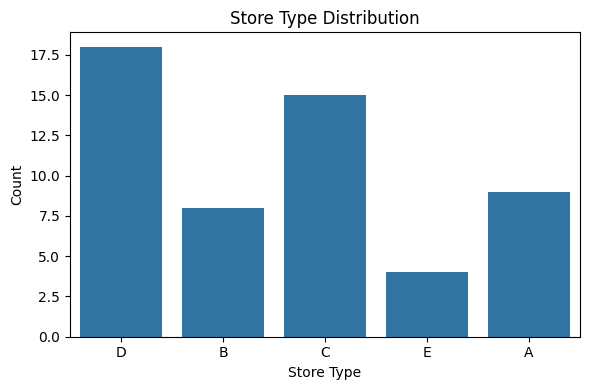

In [ ]:
# Store Type Distribution
plt.figure(figsize=(6, 4))
sns.countplot(data=stores, x='type')
plt.title("Store Type Distribution")
plt.xlabel("Store Type")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

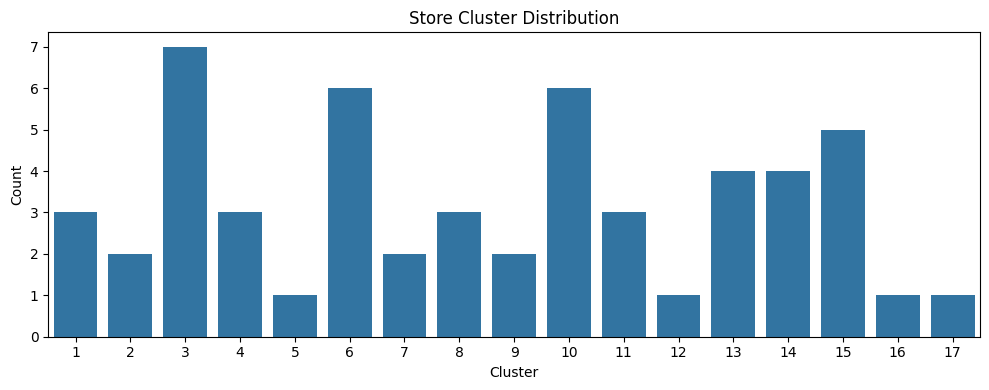

In [ ]:
# Store Cluster Distribution
plt.figure(figsize=(10, 4))
sns.countplot(data=stores, x='cluster')
plt.title("Store Cluster Distribution")
plt.xlabel("Cluster")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

In [37]:
oil.head()

,date,dcoilwtico
0,2013-01-01,NaN
1,2013-01-02,93.14
2,2013-01-03,92.97
3,2013-01-04,93.12
4,2013-01-07,93.20


In [38]:
oil['date'].max()

'2017-08-31'

In [39]:
print(oil.shape)

(1218, 2)


In [40]:
print(oil.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1218 entries, 0 to 1217
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   date        1218 non-null   object 
 1   dcoilwtico  1175 non-null   float64
dtypes: float64(1), object(1)
memory usage: 19.2+ KB
None


In [41]:
print(oil.columns.tolist())

['date', 'dcoilwtico']


In [42]:
print(oil.isnull().sum())

date           0
dcoilwtico    43
dtype: int64


In [7]:
oil['date'] = pd.to_datetime(oil['date'])

In [8]:
print(oil.dtypes)

date          datetime64[ns]
dcoilwtico           float64
dtype: object


In [45]:
print(oil.describe())

                      date   dcoilwtico
count                 1218  1175.000000
mean   2015-05-02 12:00:00    67.714366
min    2013-01-01 00:00:00    26.190000
25%    2014-03-03 06:00:00    46.405000
50%    2015-05-02 12:00:00    53.190000
75%    2016-06-30 18:00:00    95.660000
max    2017-08-31 00:00:00   110.620000
std                    NaN    25.630476


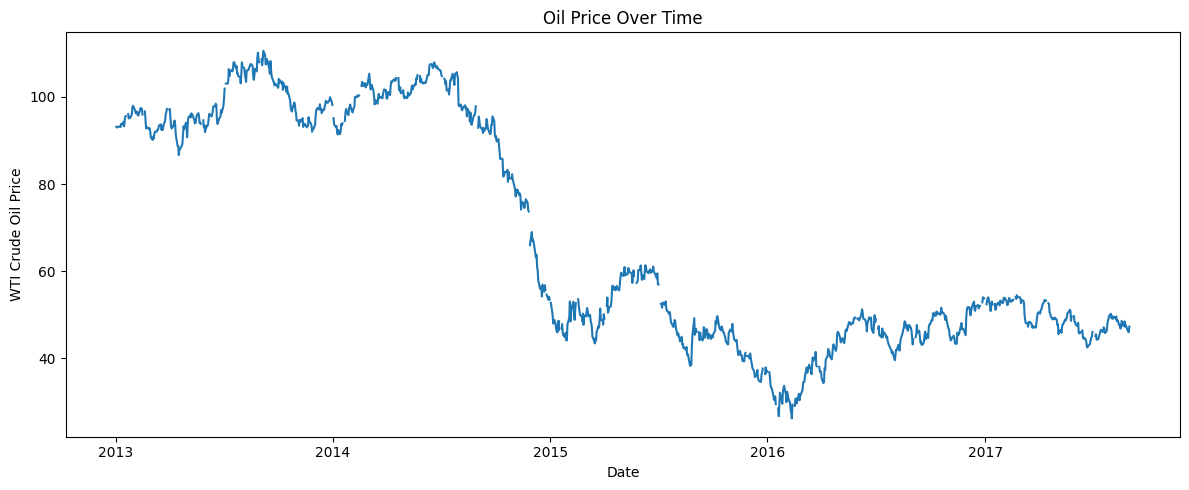

In [ ]:
# Oil Price Over Time
plt.figure(figsize=(12, 5))
plt.plot(oil['date'], oil['dcoilwtico'])
plt.title("Oil Price Over Time")
plt.xlabel("Date")
plt.ylabel("WTI Crude Oil Price")
plt.tight_layout()
plt.show()


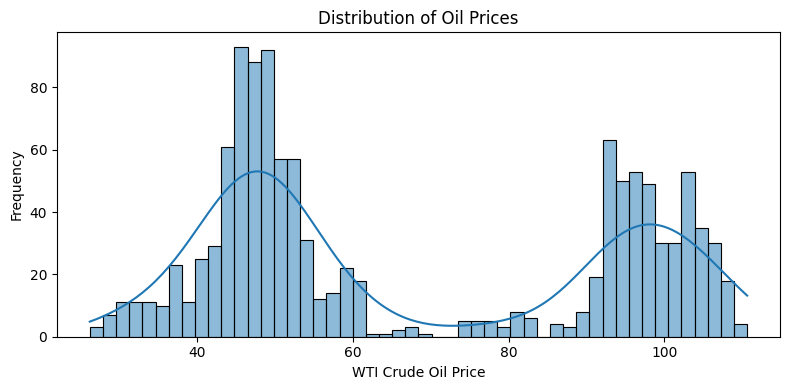

In [ ]:
# Distribution of Oil Prices
plt.figure(figsize=(8, 4))
sns.histplot(oil['dcoilwtico'].dropna(), bins=50, kde=True)
plt.title("Distribution of Oil Prices")
plt.xlabel("WTI Crude Oil Price")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

In [46]:
holidays_events.head()

,date,type,locale,locale_name,description,transferred
0,2012-03-02,Holiday,Local,Manta,Fundacion de Manta,False
1,2012-04-01,Holiday,Regional,Cotopaxi,Provincializacion de Cotopaxi,False
2,2012-04-12,Holiday,Local,Cuenca,Fundacion de Cuenca,False
3,2012-04-14,Holiday,Local,Libertad,Cantonizacion de Libertad,False
4,2012-04-21,Holiday,Local,Riobamba,Cantonizacion de Riobamba,False


In [47]:
print(holidays_events.shape)

(350, 6)


In [48]:
print(holidays_events.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   date         350 non-null    object
 1   type         350 non-null    object
 2   locale       350 non-null    object
 3   locale_name  350 non-null    object
 4   description  350 non-null    object
 5   transferred  350 non-null    bool  
dtypes: bool(1), object(5)
memory usage: 14.1+ KB
None


In [49]:
print(holidays_events.columns.tolist())

['date', 'type', 'locale', 'locale_name', 'description', 'transferred']


In [50]:
print(holidays_events.isnull().sum())

date           0
type           0
locale         0
locale_name    0
description    0
transferred    0
dtype: int64


In [9]:
holidays_events['date'] = pd.to_datetime(holidays_events['date'])

In [10]:
print(holidays_events.dtypes)

date           datetime64[ns]
type                   object
locale                 object
locale_name            object
description            object
transferred              bool
dtype: object


In [53]:
print(holidays_events.describe(include='all'))

                                 date     type    locale locale_name  \
count                             350      350       350         350   
unique                            NaN        6         3          24   
top                               NaN  Holiday  National     Ecuador   
freq                              NaN      221       174         174   
mean    2015-04-24 00:45:15.428571392      NaN       NaN         NaN   
min               2012-03-02 00:00:00      NaN       NaN         NaN   
25%               2013-12-23 06:00:00      NaN       NaN         NaN   
50%               2015-06-08 00:00:00      NaN       NaN         NaN   
75%               2016-07-03 00:00:00      NaN       NaN         NaN   
max               2017-12-26 00:00:00      NaN       NaN         NaN   

       description transferred  
count          350         350  
unique         103           2  
top       Carnaval       False  
freq            10         338  
mean           NaN         NaN  
min      

In [54]:
# Unique values per column
print("\nUnique Value Counts:")
for col in holidays_events.columns:
    print(f"{col}: {holidays_events[col].nunique()}")


Unique Value Counts:
date: 312
type: 6
locale: 3
locale_name: 24
description: 103
transferred: 2


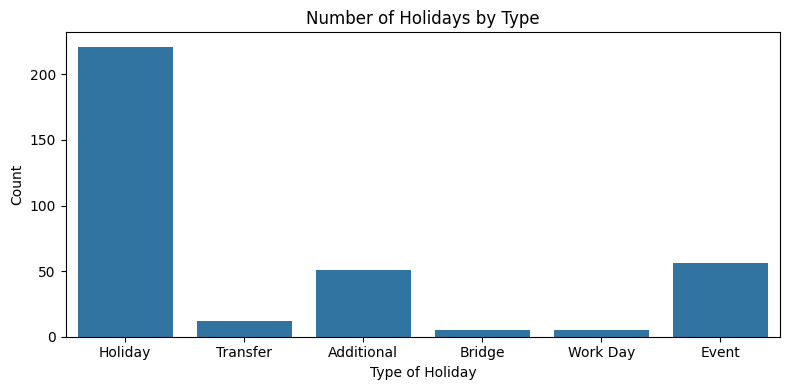

In [ ]:
# Holiday Types Distribution
plt.figure(figsize=(8, 4))
sns.countplot(data=holidays_events, x='type')
plt.title("Number of Holidays by Type")
plt.xlabel("Type of Holiday")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

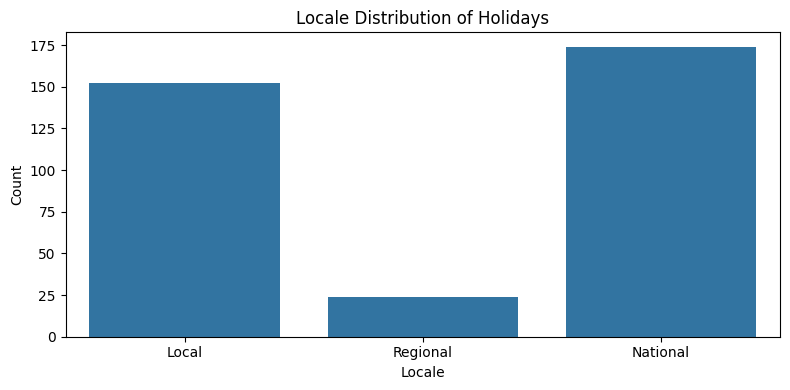

In [ ]:
# Holiday Locale Distribution
plt.figure(figsize=(8, 4))
sns.countplot(data=holidays_events, x='locale')
plt.title("Locale Distribution of Holidays")
plt.xlabel("Locale")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

In [ ]:
holidays_events['locale_name'].value_counts().head(10)

,count
locale_name,
Ecuador,174
Quito,13
Guaranda,12
Riobamba,12
Latacunga,12
Ambato,12
Guayaquil,11
Cuenca,7
Ibarra,7


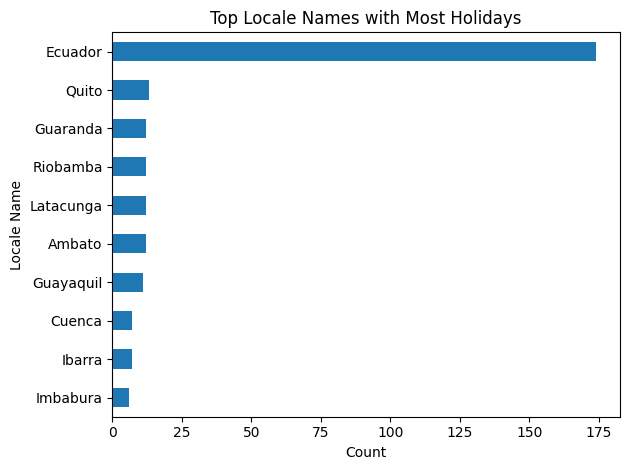

In [ ]:
top_locale_names = holidays_events['locale_name'].value_counts().head(10)
top_locale_names.plot(kind='barh')
plt.title("Top Locale Names with Most Holidays")
plt.xlabel("Count")
plt.ylabel("Locale Name")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

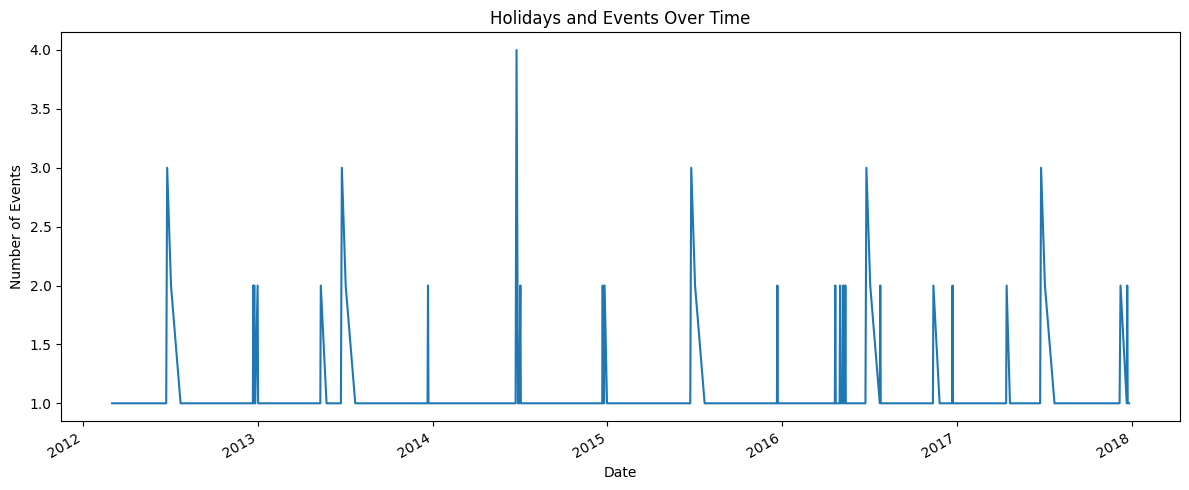

In [ ]:
# Holidays Over Time
plt.figure(figsize=(12, 5))
holidays_events['date'].value_counts().sort_index().plot()
plt.title("Holidays and Events Over Time")
plt.xlabel("Date")
plt.ylabel("Number of Events")
plt.tight_layout()
plt.show()

In [55]:
print("Transferred column value counts:")
print(holidays_events['transferred'].value_counts())

Transferred column value counts:
transferred
False    338
True      12
Name: count, dtype: int64


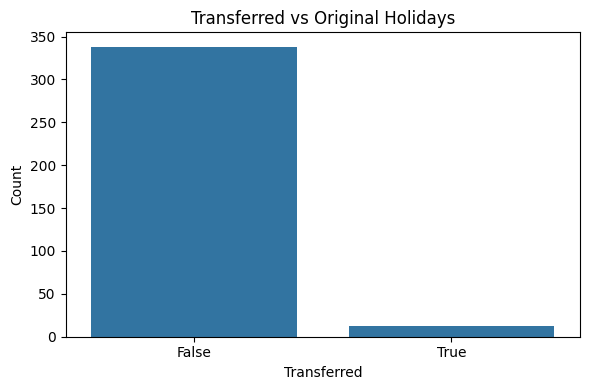

In [ ]:
# Transferred Holidays
plt.figure(figsize=(6, 4))
sns.countplot(data=holidays_events, x='transferred')
plt.title("Transferred vs Original Holidays")
plt.xlabel("Transferred")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

#EDA FOR DATA PROCESSING

In [11]:
stores.columns

Index(['store_nbr', 'city', 'state', 'type', 'cluster'], dtype='object')

In [12]:
transactions.columns

Index(['date', 'store_nbr', 'transactions'], dtype='object')

In [13]:
merged_df = pd.merge(transactions, stores, on='store_nbr', how='left')

In [14]:
merged_df.isna().sum()

,0
date,0
store_nbr,0
transactions,0
city,0
state,0
type,0
cluster,0


In [15]:
merged_df.head()

,date,store_nbr,transactions,city,state,type,cluster
0,2013-01-01,25,770,Salinas,Santa Elena,D,1
1,2013-01-02,1,2111,Quito,Pichincha,D,13
2,2013-01-02,2,2358,Quito,Pichincha,D,13
3,2013-01-02,3,3487,Quito,Pichincha,D,8
4,2013-01-02,4,1922,Quito,Pichincha,D,9


In [61]:
transactions.shape

(83488, 3)

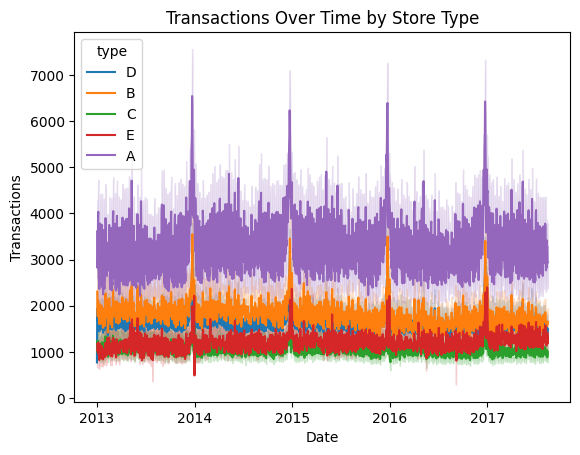

In [ ]:
sns.lineplot(data=merged_df, x='date', y='transactions', hue='type')
plt.title('Transactions Over Time by Store Type')
plt.xlabel('Date')
plt.ylabel('Transactions')
plt.show()

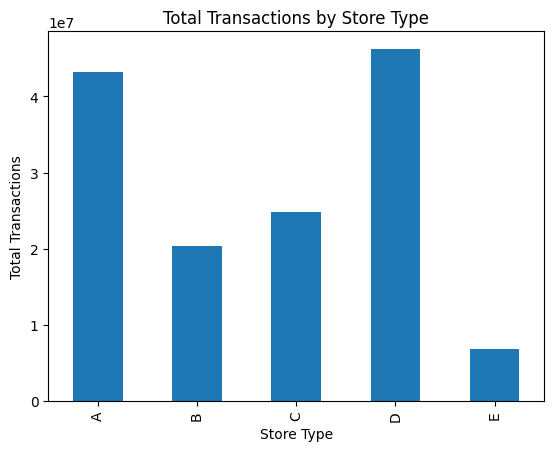

In [ ]:
merged_df.groupby('type')['transactions'].sum().plot(kind='bar')
plt.title('Total Transactions by Store Type')
plt.xlabel('Store Type')
plt.ylabel('Total Transactions')
plt.show()

In [62]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000888 entries, 0 to 3000887
Data columns (total 6 columns):
 #   Column       Dtype         
---  ------       -----         
 0   id           int64         
 1   date         datetime64[ns]
 2   store_nbr    int64         
 3   family       object        
 4   sales        float64       
 5   onpromotion  int64         
dtypes: datetime64[ns](1), float64(1), int64(3), object(1)
memory usage: 137.4+ MB


In [63]:
train.shape

(3000888, 6)

In [64]:
train.nunique()

,0
id,3000888
date,1684
store_nbr,54
family,33
sales,379610
onpromotion,362


In [65]:
stores.nunique()

,0
store_nbr,54
city,22
state,16
type,5
cluster,17


In [66]:
transactions.nunique()

,0
date,1682
store_nbr,54
transactions,4993


In [16]:
merged_train_master = pd.merge(train, merged_df, on=['store_nbr', 'date'], how='left')

In [17]:
merged_train_master.isna().sum()

,0
id,0
date,0
store_nbr,0
family,0
sales,0
onpromotion,0
transactions,245784
city,245784
state,245784
type,245784


In [17]:
merged_train_master.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1238461 entries, 0 to 1238460
Data columns (total 11 columns):
 #   Column        Non-Null Count    Dtype         
---  ------        --------------    -----         
 0   id            1238461 non-null  int64         
 1   date          1238461 non-null  datetime64[ns]
 2   store_nbr     1238461 non-null  int64         
 3   family        1238461 non-null  object        
 4   sales         1238461 non-null  float64       
 5   onpromotion   1238460 non-null  float64       
 6   transactions  1071217 non-null  float64       
 7   city          1071217 non-null  object        
 8   state         1071217 non-null  object        
 9   type          1071217 non-null  object        
 10  cluster       1071217 non-null  float64       
dtypes: datetime64[ns](1), float64(4), int64(2), object(4)
memory usage: 103.9+ MB


In [18]:
temp = merged_train_master[merged_train_master['transactions'].notnull()]

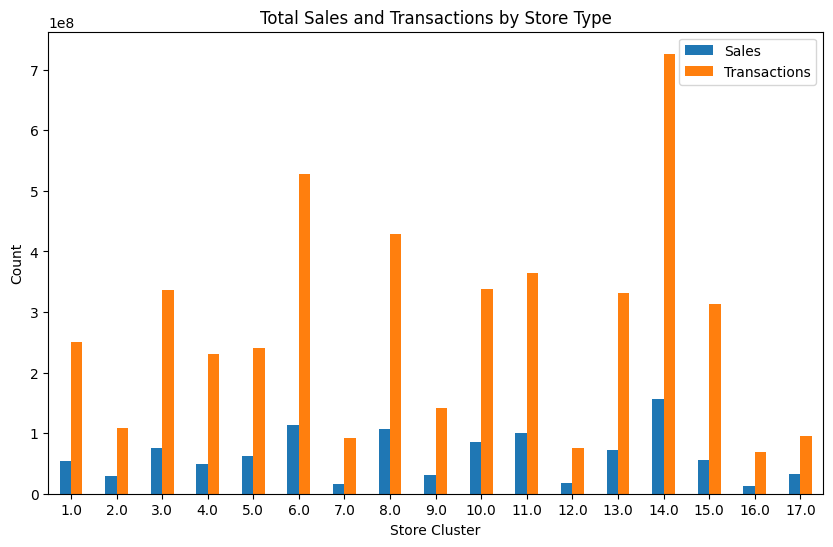

In [19]:
# Group by store type and sum sales and transactions
sales_transactions_by_type = temp.groupby('cluster')[['sales', 'transactions']].sum()

# Create a bar plot to compare sales and transactions
sales_transactions_by_type.plot(kind='bar', figsize=(10, 6))
plt.title('Total Sales and Transactions by Store Type')
plt.xlabel('Store Cluster')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(['Sales', 'Transactions'])
plt.show()

# OIL

In [20]:
oil.head()

,date,dcoilwtico
0,2013-01-01,NaN
1,2013-01-02,93.14
2,2013-01-03,92.97
3,2013-01-04,93.12
4,2013-01-07,93.20


In [21]:
oil['dcoilwtico'] = oil['dcoilwtico'].interpolate().bfill().ffill()

In [22]:
oil['lag_15'] = oil['dcoilwtico'].shift(15)
oil['lag_30'] = oil['dcoilwtico'].shift(30)
oil['rolling_mean_7'] = oil['dcoilwtico'].rolling(window=7).mean()

display(oil.head(40))

,date,dcoilwtico,lag_15,lag_30,rolling_mean_7
0,2013-01-01,93.14,NaN,NaN,NaN
1,2013-01-02,93.14,NaN,NaN,NaN
2,2013-01-03,92.97,NaN,NaN,NaN
3,2013-01-04,93.12,NaN,NaN,NaN
4,2013-01-07,93.20,NaN,NaN,NaN
5,2013-01-08,93.21,NaN,NaN,NaN
6,2013-01-09,93.08,NaN,NaN,93.122857
7,2013-01-10,93.81,NaN,NaN,93.218571
8,2013-01-11,93.60,NaN,NaN,93.284286
9,2013-01-14,94.27,NaN,NaN,93.470000


In [23]:
train['date'] = pd.to_datetime(train['date'])
test['date'] = pd.to_datetime(test['date'])
oil['date'] = pd.to_datetime(oil['date'])

In [24]:
trainxoil = pd.merge(train, oil, on='date', how='left')

In [25]:
train.shape

(3000888, 6)

In [26]:
trainxoil[['family','sales']+list(oil.columns)].drop(columns = ["date"]).dropna().groupby("family").corr()

sales  dcoilwtico    lag_15    lag_30  \
family                                                                
AUTOMOTIVE sales           1.000000   -0.147084 -0.147351 -0.147447   
           dcoilwtico     -0.147084    1.000000  0.983472  0.964195   
           lag_15         -0.147351    0.983472  1.000000  0.983568   
           lag_30         -0.147447    0.964195  0.983568  1.000000   
           rolling_mean_7 -0.147165    0.998095  0.988244  0.969585   
...                             ...         ...       ...       ...   
SEAFOOD    sales           1.000000   -0.044730 -0.043662 -0.044315   
           dcoilwtico     -0.044730    1.000000  0.983472  0.964195   
           lag_15         -0.043662    0.983472  1.000000  0.983568   
           lag_30         -0.044315    0.964195  0.983568  1.000000   
           rolling_mean_7 -0.044581    0.998095  0.988244  0.969585   

                           rolling_mean_7  
family                                     
AUTOMOTIVE sales                -0.147165  
           dcoilwtico            0.998095  
           lag_15                0.988244  
           lag_30                0.969585  
           rolling_mean_7        1.000000  
...                                   ...  
SEAFOOD    sales                -0.044581  
           dcoilwtico            0.998095  
           lag_15                0.988244  
           lag_30                0.969585  
           rolling_mean_7        1.000000  

[165 rows x 5 columns]

# TRANSACTIONS


In [27]:
holidays_events.head()

,date,type,locale,locale_name,description,transferred
0,2012-03-02,Holiday,Local,Manta,Fundacion de Manta,False
1,2012-04-01,Holiday,Regional,Cotopaxi,Provincializacion de Cotopaxi,False
2,2012-04-12,Holiday,Local,Cuenca,Fundacion de Cuenca,False
3,2012-04-14,Holiday,Local,Libertad,Cantonizacion de Libertad,False
4,2012-04-21,Holiday,Local,Riobamba,Cantonizacion de Riobamba,False


In [28]:
holidays_events['locale'].value_counts()

,count
locale,
National,174
Local,152
Regional,24


In [29]:
holidays_events_filter = holidays_events[holidays_events['transferred'] == False]

In [30]:
holidays_events_filter = pd.concat([
    holidays_events_filter,
    pd.get_dummies(holidays_events_filter["locale"]).astype(int).rename(
        columns={
            "Local": "Is_Locale_Holiday_L",
            "National": "Is_Locale_Holiday_N",
            "Regional": "Is_Locale_Holiday_R",
        }
    ),
], axis=1)

In [31]:
holidays_events_filter.head()

,date,type,locale,locale_name,description,transferred,Is_Locale_Holiday_L,Is_Locale_Holiday_N,Is_Locale_Holiday_R
0,2012-03-02,Holiday,Local,Manta,Fundacion de Manta,False,1,0,0
1,2012-04-01,Holiday,Regional,Cotopaxi,Provincializacion de Cotopaxi,False,0,0,1
2,2012-04-12,Holiday,Local,Cuenca,Fundacion de Cuenca,False,1,0,0
3,2012-04-14,Holiday,Local,Libertad,Cantonizacion de Libertad,False,1,0,0
4,2012-04-21,Holiday,Local,Riobamba,Cantonizacion de Riobamba,False,1,0,0


In [32]:
def feature_engineer_transactions(df):
    df['date'] = pd.to_datetime(df['date'])
    df['day'] = df.date.dt.day
    df['is_weekend'] = (df.date.dt.dayofweek >= 5).astype(int)
    df['year'] = df.date.dt.year
    df['month'] = df.date.dt.month
    df['quarter'] = df.date.dt.quarter
    df['day_of_week'] = df.date.dt.dayofweek
    df['is_holiday'] = df.date.isin(holidays_events.date).astype(int)
    return df

transactions = feature_engineer_transactions(transactions)
display(transactions.head())

,date,store_nbr,transactions,day,is_weekend,year,month,quarter,day_of_week,is_holiday
0,2013-01-01,25,770,1,0,2013,1,1,1,1
1,2013-01-02,1,2111,2,0,2013,1,1,2,0
2,2013-01-02,2,2358,2,0,2013,1,1,2,0
3,2013-01-02,3,3487,2,0,2013,1,1,2,0
4,2013-01-02,4,1922,2,0,2013,1,1,2,0


In [33]:
transactions_by_day_of_week = transactions.groupby(['store_nbr', 'day_of_week'])['transactions'].median().unstack().reset_index()

transactions_by_day_of_week.columns = (['store_nbr'] + [f'Footfall_Day_{i}' for i in range(7)])


In [34]:
transactions_by_day_of_week.head()

,store_nbr,Footfall_Day_0,Footfall_Day_1,Footfall_Day_2,Footfall_Day_3,Footfall_Day_4,Footfall_Day_5,Footfall_Day_6
0,1,1781.0,1759.5,1867.0,1731.0,1833.0,1305.0,508.0
1,2,1835.5,1798.0,1918.0,1772.0,1909.0,2066.0,1985.0
2,3,2963.5,2845.0,3073.0,2808.0,3198.0,3604.5,3567.0
3,4,1382.5,1360.0,1472.0,1329.0,1463.0,1654.5,1725.5
4,5,1441.0,1335.0,1398.0,1304.0,1404.0,1498.5,1345.0


In [35]:
merged_transactions_stores = pd.merge(stores,transactions_by_day_of_week, on='store_nbr', how='left')

In [36]:
merged_transactions_stores.head()

,store_nbr,city,state,type,cluster,Footfall_Day_0,Footfall_Day_1,Footfall_Day_2,Footfall_Day_3,Footfall_Day_4,Footfall_Day_5,Footfall_Day_6
0,1,Quito,Pichincha,D,13,1781.0,1759.5,1867.0,1731.0,1833.0,1305.0,508.0
1,2,Quito,Pichincha,D,13,1835.5,1798.0,1918.0,1772.0,1909.0,2066.0,1985.0
2,3,Quito,Pichincha,D,8,2963.5,2845.0,3073.0,2808.0,3198.0,3604.5,3567.0
3,4,Quito,Pichincha,D,9,1382.5,1360.0,1472.0,1329.0,1463.0,1654.5,1725.5
4,5,Santo Domingo,Santo Domingo de los Tsachilas,D,4,1441.0,1335.0,1398.0,1304.0,1404.0,1498.5,1345.0


In [107]:
stores.shape

(54, 5)

In [37]:
merged_transactions_stores.shape

(54, 12)

In [38]:
merged_transactions_stores.isnull().sum()

,0
store_nbr,0
city,0
state,0
type,0
cluster,0
Footfall_Day_0,0
Footfall_Day_1,0
Footfall_Day_2,0
Footfall_Day_3,0
Footfall_Day_4,0


In [39]:
merged_transactions_stores['avg_weekly_footfall'] = merged_transactions_stores.iloc[:, -7: ].mean(axis=1)

In [40]:
temp1 = train.head().set_index('date')

In [41]:
temp1.head()

,id,store_nbr,family,sales,onpromotion
date,,,,,
2013-01-01,0,1,AUTOMOTIVE,0.0,0
2013-01-01,1,1,BABY CARE,0.0,0
2013-01-01,2,1,BEAUTY,0.0,0
2013-01-01,3,1,BEVERAGES,0.0,0
2013-01-01,4,1,BOOKS,0.0,0


In [40]:
temp1.iloc[1,2]

'BABY CARE'

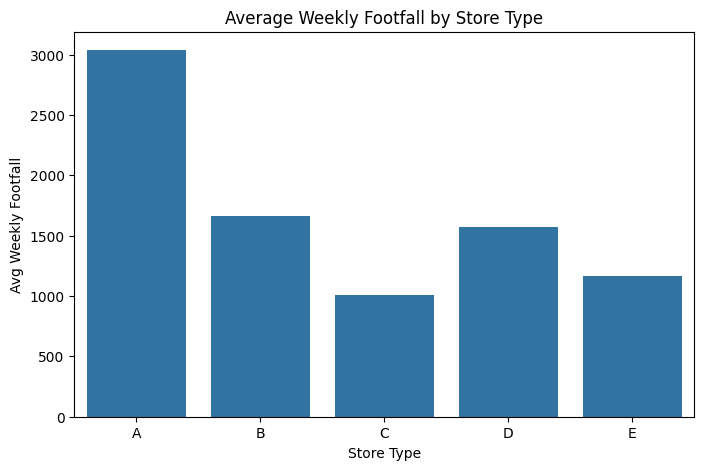

In [42]:
type_footfall = merged_transactions_stores.groupby('type')['avg_weekly_footfall'].mean().reset_index()

plt.figure(figsize=(8,5))
sns.barplot(data=type_footfall, x='type', y='avg_weekly_footfall')
plt.title('Average Weekly Footfall by Store Type')
plt.xlabel('Store Type')
plt.ylabel('Avg Weekly Footfall')
plt.show()

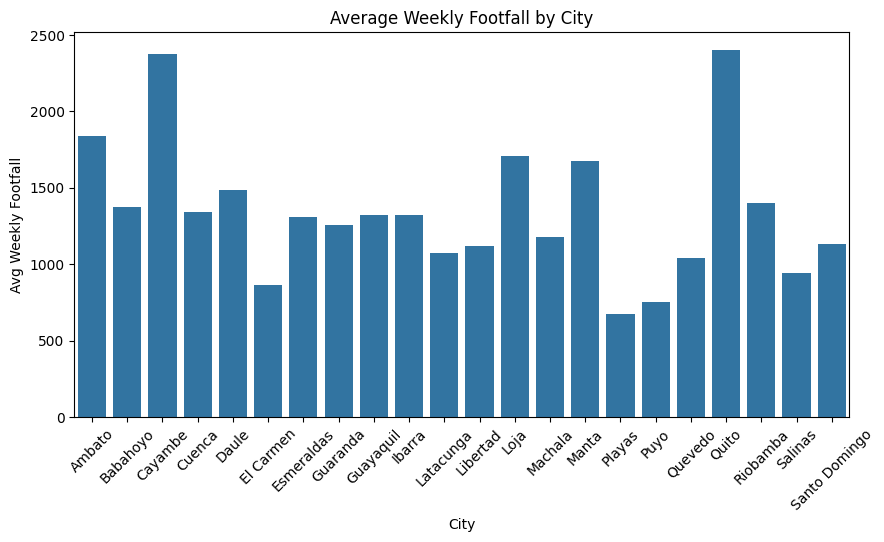

In [ ]:
city_footfall = merged_transactions_stores.groupby('city')['avg_weekly_footfall'].mean().reset_index()

plt.figure(figsize=(10,5))
sns.barplot(data=city_footfall, x='city', y='avg_weekly_footfall')
plt.title('Average Weekly Footfall by City')
plt.xlabel('City')
plt.ylabel('Avg Weekly Footfall')
plt.xticks(rotation=45)
plt.show()

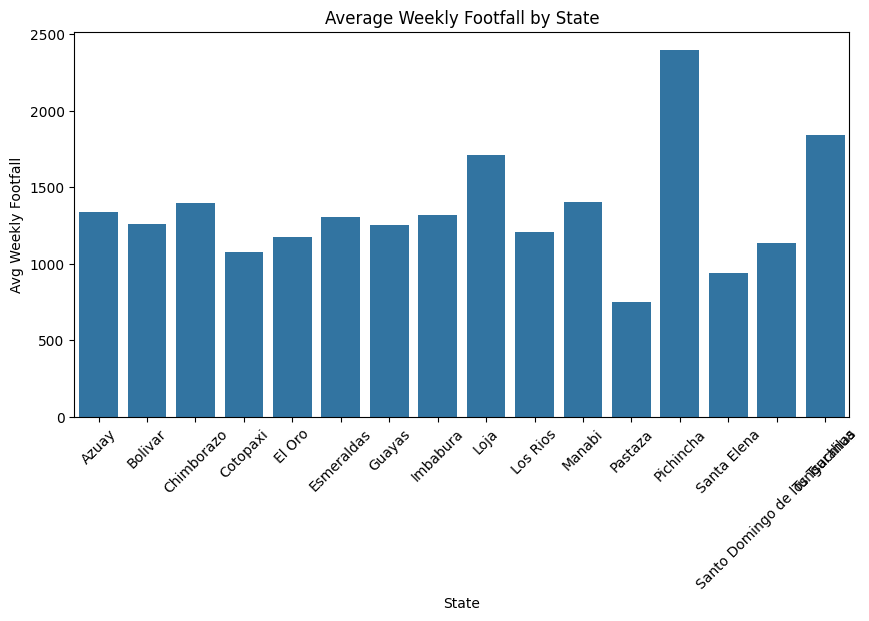

In [ ]:
state_footfall = merged_transactions_stores.groupby('state')['avg_weekly_footfall'].mean().reset_index()

plt.figure(figsize=(10,5))
sns.barplot(data=state_footfall, x='state', y='avg_weekly_footfall')
plt.title('Average Weekly Footfall by State')
plt.xlabel('State')
plt.ylabel('Avg Weekly Footfall')
plt.xticks(rotation=45)
plt.show()

In [43]:
train['month'] = train['date'].dt.month

In [49]:
monthly_sales = train.groupby(['family', 'month'])['sales'].sum().reset_index()

In [50]:
best_month_df = monthly_sales.loc[monthly_sales.groupby('family')['sales'].idxmax()]

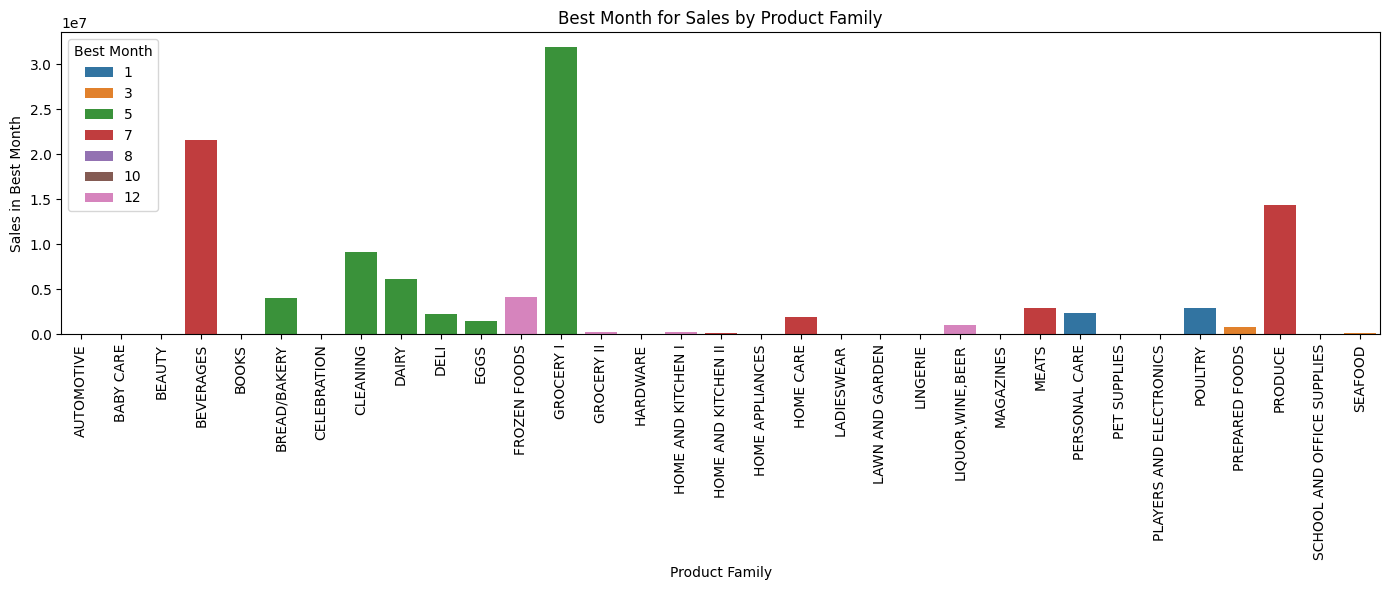

In [51]:
best_month_df = best_month_df.rename(columns={'month': 'best_month', 'sales': 'best_month_sales'})

plt.figure(figsize=(14,6))
sns.barplot(data=best_month_df, x='family', y='best_month_sales', hue='best_month', palette='tab10')
plt.title('Best Month for Sales by Product Family')
plt.xlabel('Product Family')
plt.ylabel('Sales in Best Month')
plt.xticks(rotation=90)
plt.legend(title='Best Month')
plt.tight_layout()
plt.show()

In [46]:
train['onpromotion_lag_1'] = train['onpromotion'].shift(1)
train['onpromotion_lag_7'] = train['onpromotion'].shift(7)
train['onpromotion_lag_30'] = train['onpromotion'].shift(30)

display(train.head())

,id,date,store_nbr,family,sales,onpromotion,month,onpromotion_lag_1,onpromotion_lag_7,onpromotion_lag_30
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0,1,NaN,NaN,NaN
1,1,2013-01-01,1,BABY CARE,0.0,0,1,0.0,NaN,NaN
2,2,2013-01-01,1,BEAUTY,0.0,0,1,0.0,NaN,NaN
3,3,2013-01-01,1,BEVERAGES,0.0,0,1,0.0,NaN,NaN
4,4,2013-01-01,1,BOOKS,0.0,0,1,0.0,NaN,NaN


In [47]:
train['onpromotion_pct_change_1'] = train['onpromotion'].pct_change(periods=1)
train['onpromotion_pct_change_7'] = train['onpromotion'].pct_change(periods=7)
train['onpromotion_pct_change_30'] = train['onpromotion'].pct_change(periods=30)

display(train.head())

,id,date,store_nbr,family,sales,onpromotion,month,onpromotion_lag_1,onpromotion_lag_7,onpromotion_lag_30,onpromotion_pct_change_1,onpromotion_pct_change_7,onpromotion_pct_change_30
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0,1,NaN,NaN,NaN,NaN,NaN,NaN
1,1,2013-01-01,1,BABY CARE,0.0,0,1,0.0,NaN,NaN,NaN,NaN,NaN
2,2,2013-01-01,1,BEAUTY,0.0,0,1,0.0,NaN,NaN,NaN,NaN,NaN
3,3,2013-01-01,1,BEVERAGES,0.0,0,1,0.0,NaN,NaN,NaN,NaN,NaN
4,4,2013-01-01,1,BOOKS,0.0,0,1,0.0,NaN,NaN,NaN,NaN,NaN
